- Filters before the mixer have a relatively large BW. Most filtering is done at the IF, so the Q value requirement is lower.
https://electronics.stackexchange.com/questions/153830/should-i-use-a-passive-or-an-active-filter
- Plan to use a simple LC circuit with a variable capacitor for tuning
- Maximum current in an LC circuit is given by V/sqrt(L/C)
- Choose L = 1 uH. Then for us to have a range of 88 MHz to 108 MHZ, We need a 1/(2*pi*sqrt(1*10^-6*C)) = 88*(10^6) for the lower bound and 1/(2*pi*sqrt(1*(10^-6)*C)) = 108*10^6 for the upper bound. 
- Using parallel LC (tank filter) since it has a very small passband. Approximating the band pass as an ideal filter only allowing a single frequency, we would need a capacitance range of 2.17 pF to 3.27 pF. To be safe let's choose a tunable cap between 1 pF and 5 pF. 


Impedance Matching

- Can use a variable capacitor for tuning the resonant frequency and another variable capacitor for matching, like so:
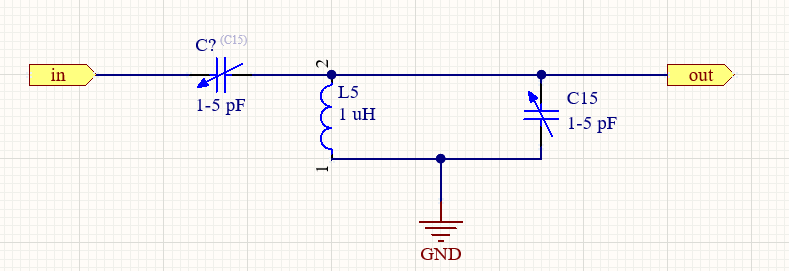

- At the resonant frequency, the (ideal) LC circuit impedance is 0! So the only impedance is due to the cap. Instead of using a tuning cap, we can just use a resistor, so that we don't have to tune two capacitors to set the frequency. Since the signal amplitude is relatively small since it is being received by an antenna from the air, we don't really have to worry about the power dissipation.
- The inductors and capacitors we are using both have a DC resistance of 360 mOhms. This means that at resonance the resistance will be 360||360 = 180 mOhms, and we want a 49.8 ohm resistor. 49.9 is close enough.

New circuit:

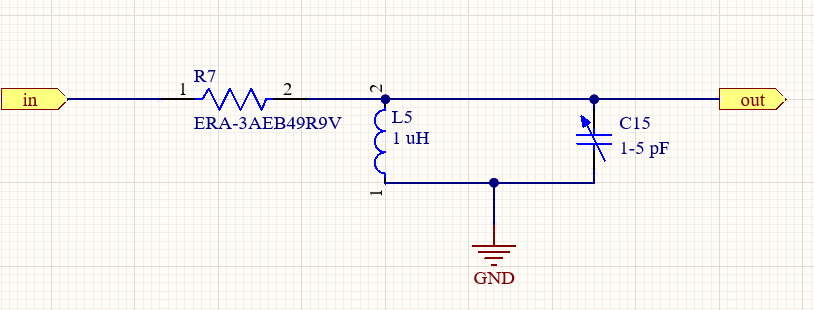

- Since the impedance to ground is very high the resonant frequency, the signal is able to pass from in to out unchanged.

Q factor

- It seems like the formula for the Q factor of a parallel LC resonant filter is given by 

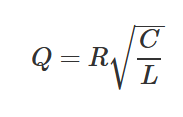

- This means that for an impedance of 50 ohms, the filter will have almost no attenuation at 88 MHz when tuned to 108 MHz. Do we need an impedance matching network here maybe?
- There are a few different options for impedance matching:
    1. Transformer matching - uses the ratio of the number of turns to transform impedances - good for high Q.
    2. L-network matching - uses and inductor + cap
    3. Tapped coil matching - this taps an inductor at a certain point. Good for high Q and gain.

- According to https://www.allaboutcircuits.com/textbook/radio-frequency-analysis-design/selected-topics/understanding-matching-networks/, the L-network is not suitable for high frequency applications. 100 MHz is mid-to-high frequency so let's go with a transformer matching circuit.
- According to https://info.triadmagnetics.com/hubfs/PDF_Offers/Impedance_Matching_Transformers_FINAL.pdf, the ratio of the number of turns for appropriate impedance matching is given by 

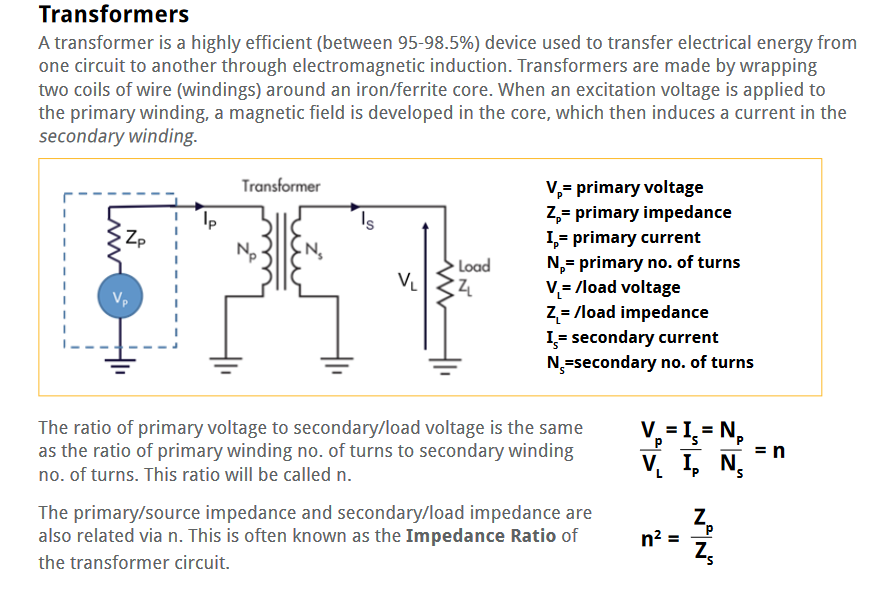

- For a reasonable Q factor, we need an input impedance of around 1Mohms. If our input impedance is 1M, and we want a load impedance of 50, then n^2 = 50/1M = 5*10^-5 => n = 0.007. This is far too high a value to reasonable acheive with a transformer. 
- According to perplexity, a better solution is to use a unity gain buffer amplifier to change the input impedance from a high value to a low value.


- Actually, we might just be able to adjust L and C to get a lower input impedance. For the frequency of 108 MHz, we need 1/(2*pi*sqrt(LC)) = fr = 108 MHz, and we also need R*sqrt(C/L) = Q factor = 5 (seems like a reasonable good starting point). R = 50 ohms for impedance matching. 
- Those two requirements give us two traces which intersect like this:

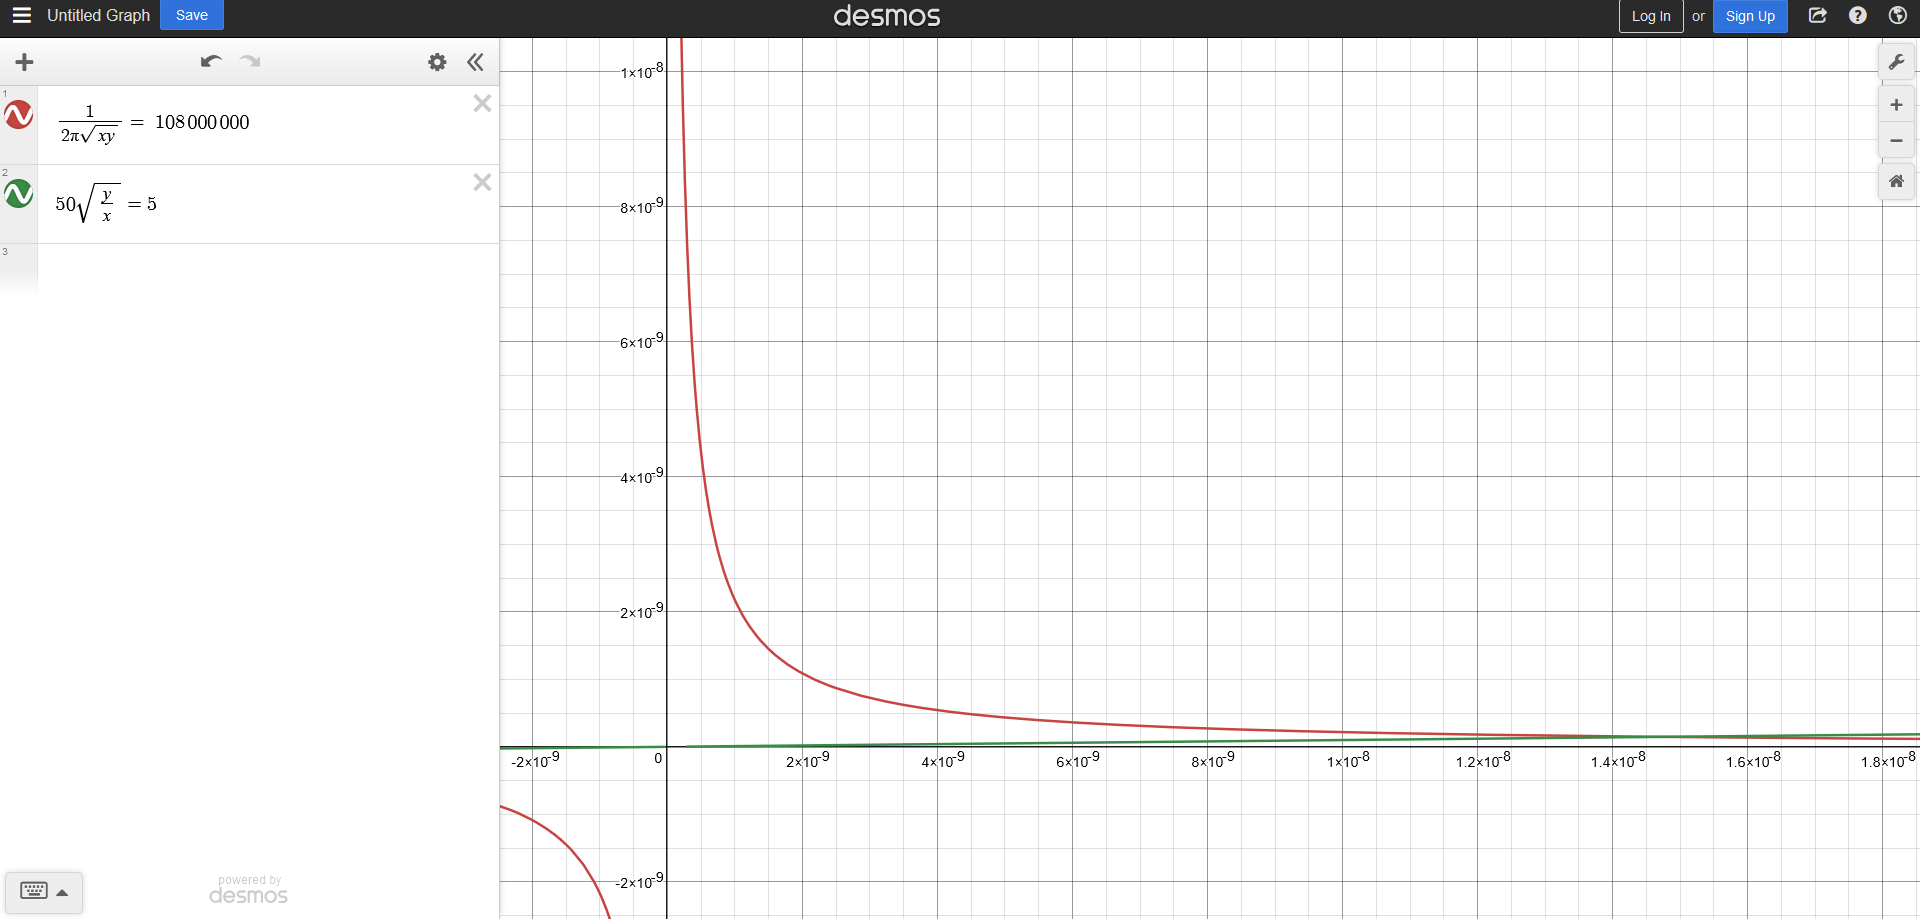


These two intersect at L = 1.47365 * 10^-8 H and C = 1.474 * 10^-10 F.

Let's try simulating this.

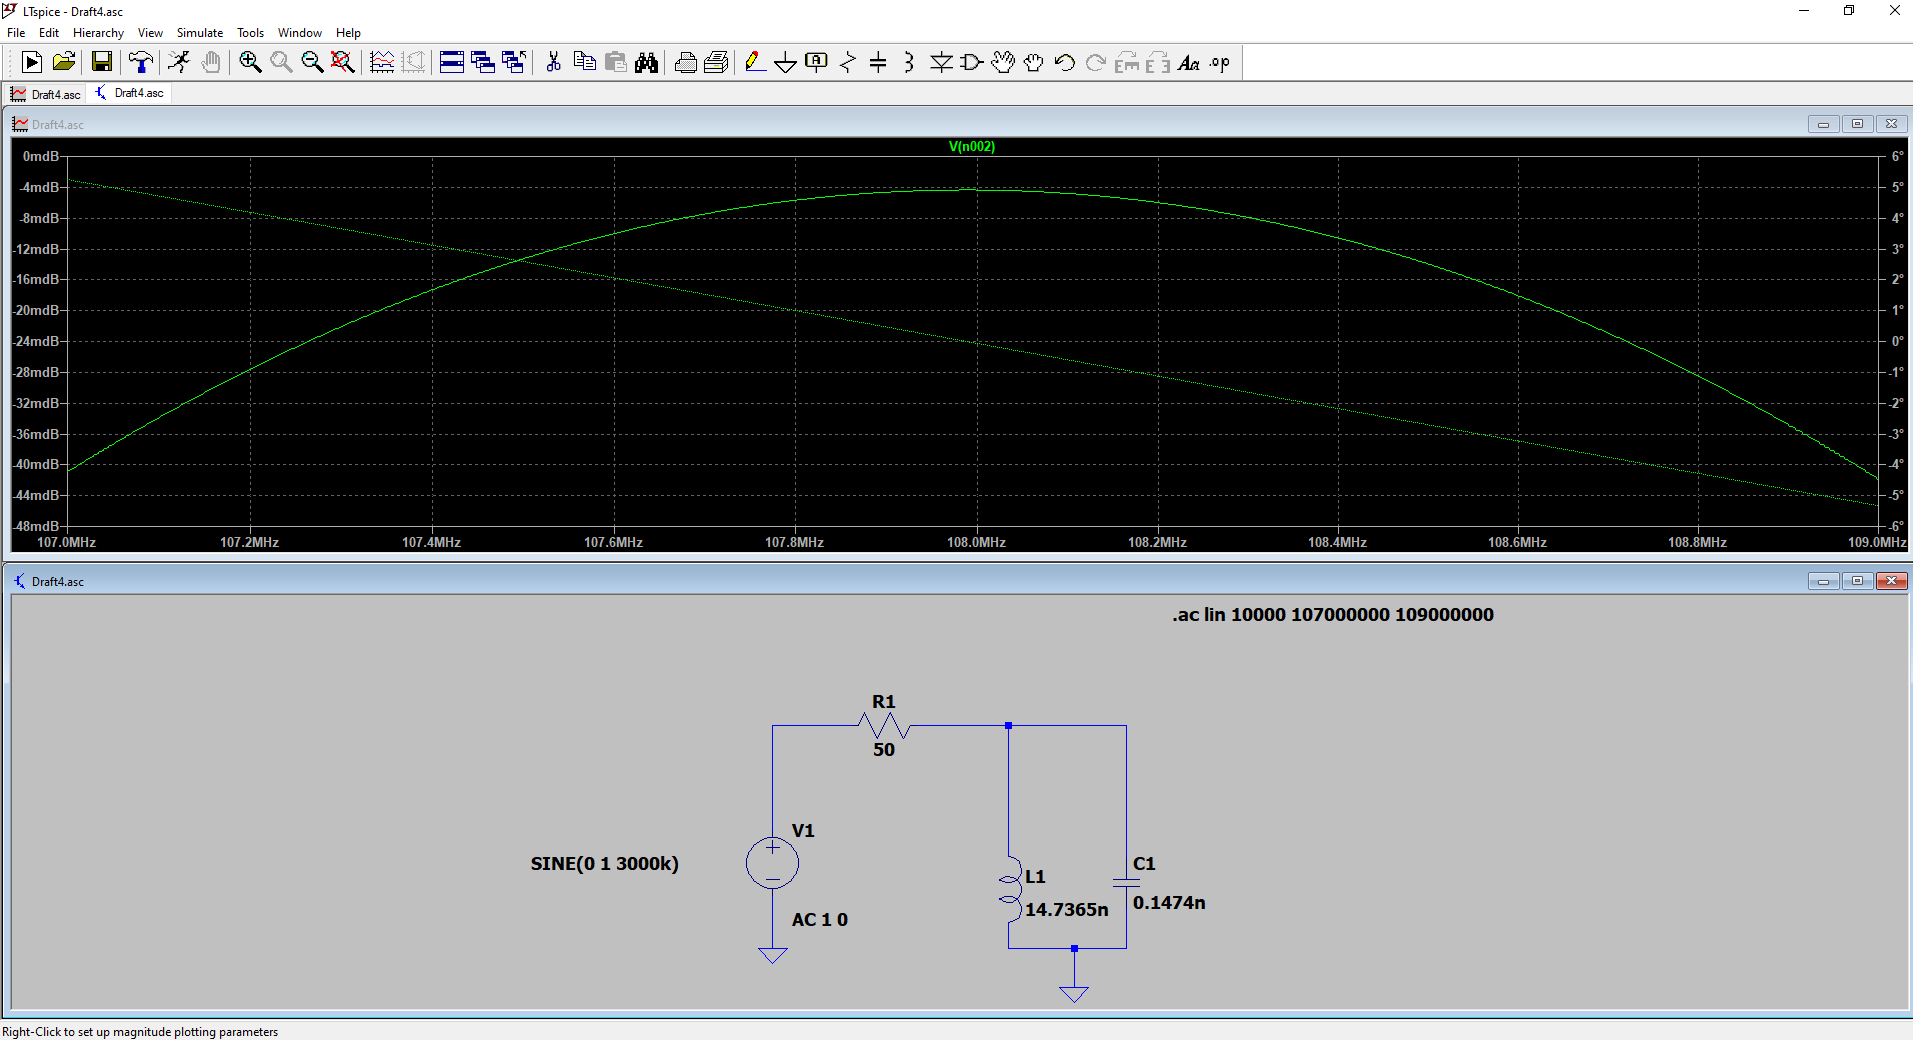

Clearly, this is not good enough since there's barely any attenuation at 107.8 MHz. Let's try Q = 5000. This gives us L = 1.4736569e-11 and C = 1.47365688e-7 F. Let's try simulating this.

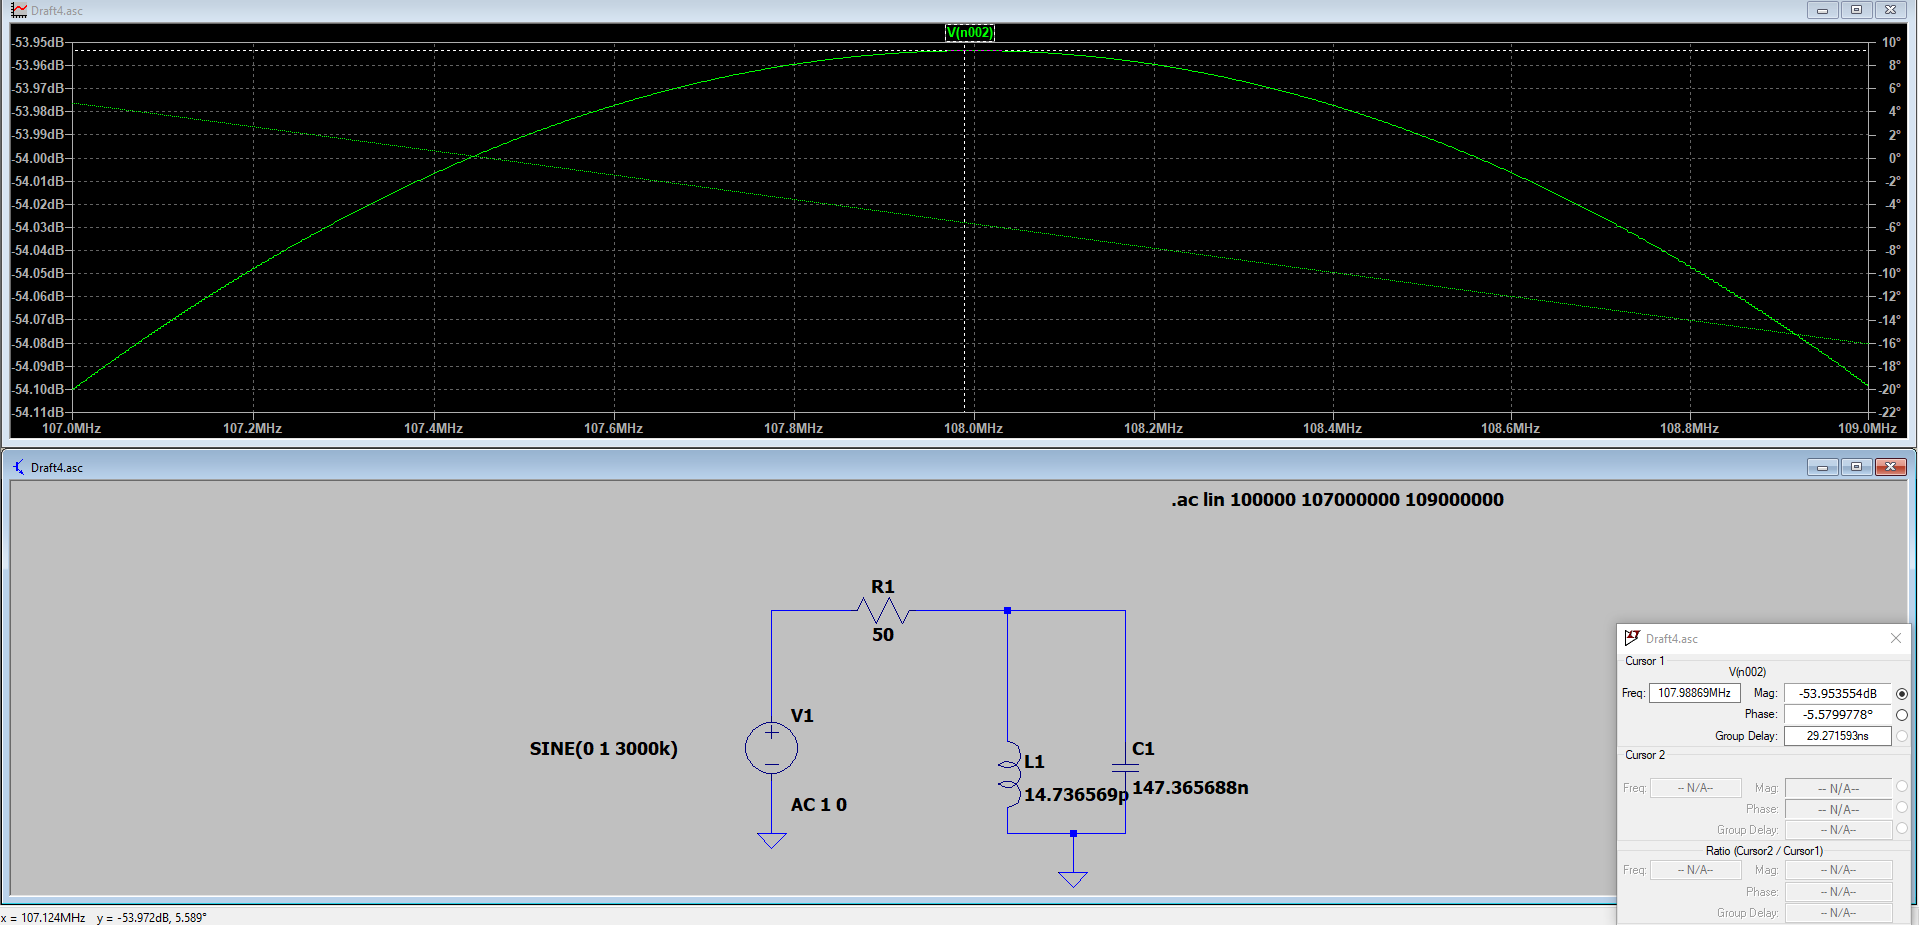

Why does the Q value online not match our simulations? According to perplexity, it seems like it has to do with the parasitics. I tried changing the series resistance of the inductor to a much smaller value and it resulted in a much sharper resonant freq. However, it's not really possible to get rid of parasitics - even the smallest values for DCR I found were around 1.3 mohms and didn't have the inductance I needed. 

- It seems like we can potenially combine multiple LC filters for a sharper response? Like a chebyshev filter?

- This website has a LC filter designer for chebyshev filters: https://markimicrowave.com/technical-resources/tools/lc-filter-design-tool/
- Upon some further research, it seems like Chebyshev filters are not a good choice since they have a variable group delay which can result in distortion. https://www.eevblog.com/forum/beginners/does-the-_shape_-of-an-fm-bandpass-filter-matter/
- Looks like the gain flatness doesn't matter too much.
- Bessel filters are the best since they have no group delay.
- Todo: replace the varactors in the bessel filter with the model SMV1130 in LTSPICE. 

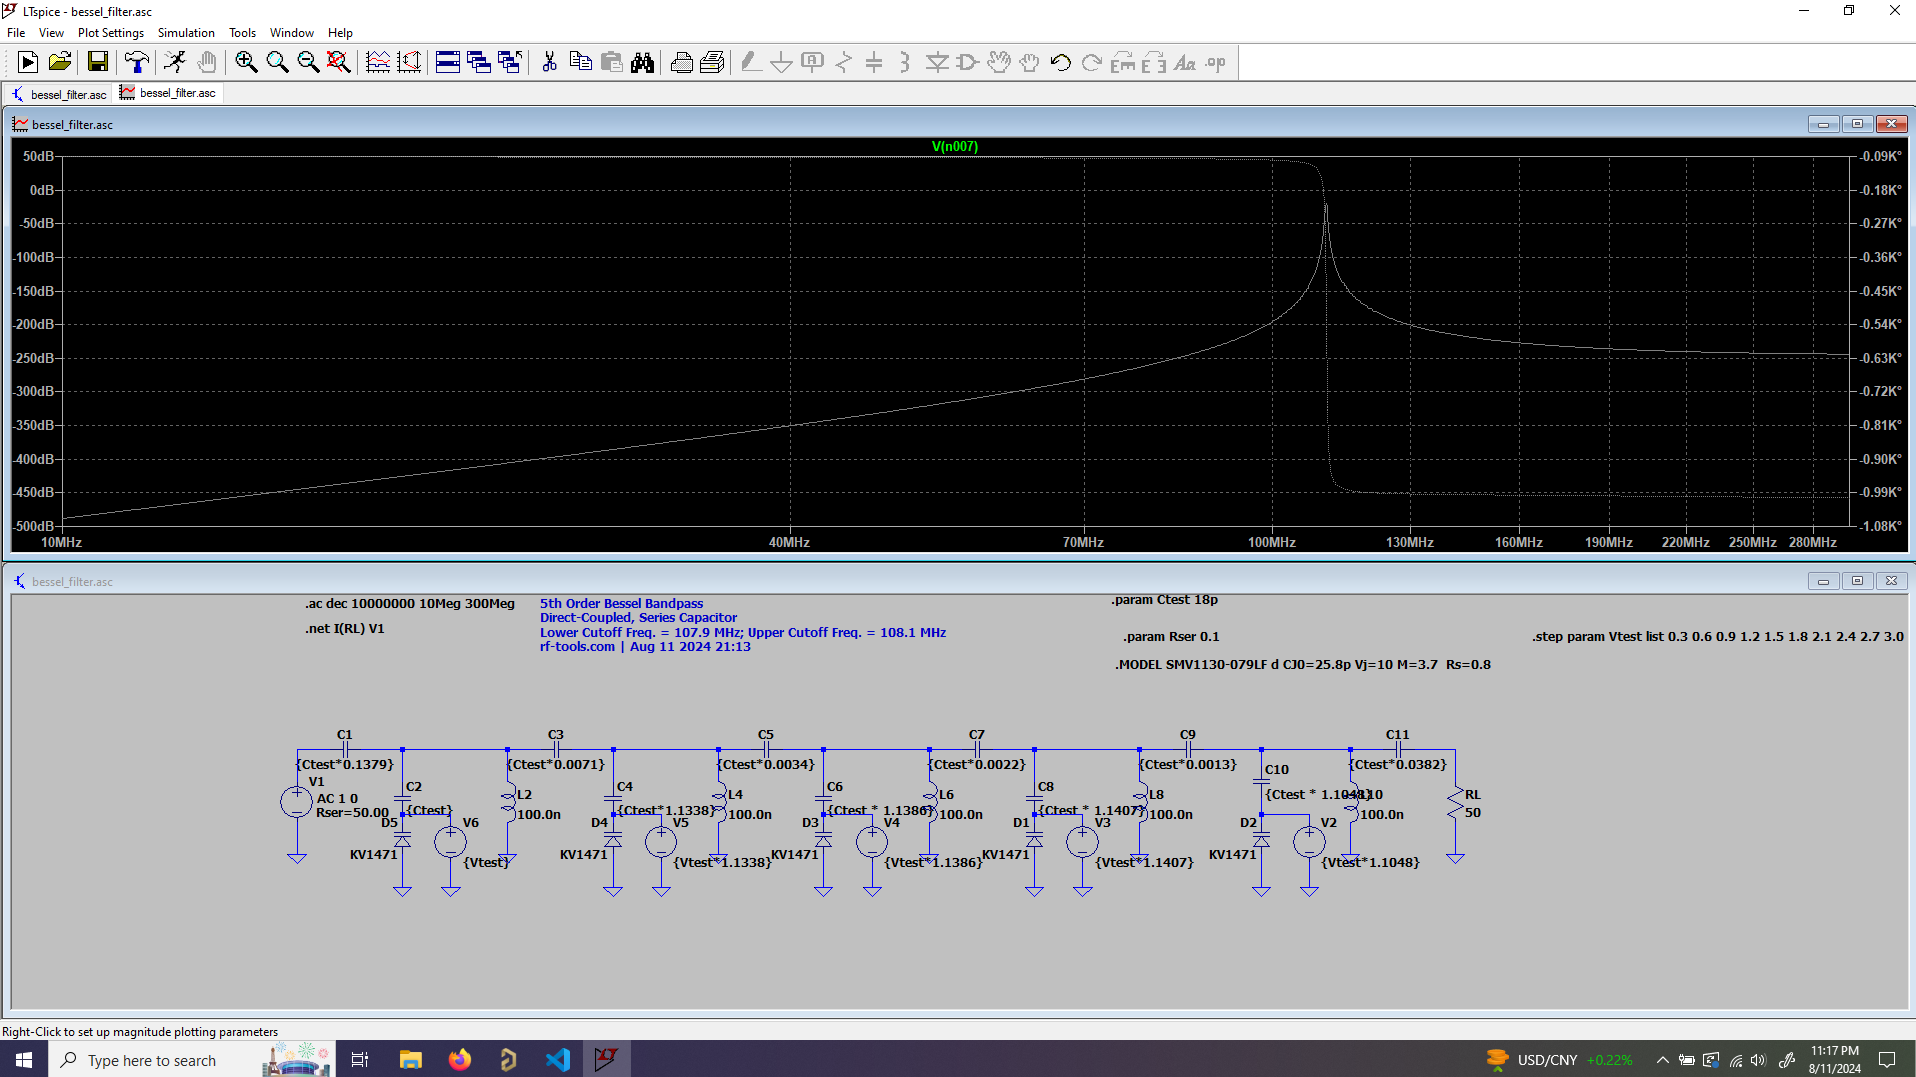


- Scaling all caps proportionally to change the bandpass center frequency results in distortion. See file:///C:/Users/piyus/Downloads/mar2000pg32.pdf for the proper way to tune a bandpass filter.